In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/Colab Notebooks/fruit-ripening.zip" -d "/content/datasets"

Archive:  /content/drive/MyDrive/Colab Notebooks/fruit-ripening.zip
  inflating: /content/datasets/info.csv  
  inflating: /content/datasets/submission.csv  
  inflating: /content/datasets/test/test/abdy9380.png  
  inflating: /content/datasets/test/test/adua0170.png  
  inflating: /content/datasets/test/test/aebq0222.png  
  inflating: /content/datasets/test/test/aeew6117.png  
  inflating: /content/datasets/test/test/aegl6733.png  
  inflating: /content/datasets/test/test/agsl3254.png  
  inflating: /content/datasets/test/test/ahzf2150.png  
  inflating: /content/datasets/test/test/aixr7229.png  
  inflating: /content/datasets/test/test/ajfw9839.png  
  inflating: /content/datasets/test/test/ajxc0220.png  
  inflating: /content/datasets/test/test/akdx3674.png  
  inflating: /content/datasets/test/test/alrn1123.png  
  inflating: /content/datasets/test/test/amas5936.png  
  inflating: /content/datasets/test/test/amlq9972.png  
  inflating: /content/datasets/test/test/aomz7213.png  
  

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
from tqdm import tqdm

In [ ]:
df = pd.read_csv('/content/datasets/submission.csv')
df

,FileName,Class
0,abdy9380.png,0.0
1,adua0170.png,0.0
2,aebq0222.png,5.0
3,aeew6117.png,NaN
4,aegl6733.png,NaN
...,...,...
668,zvxc1988.png,NaN
669,zyms7894.png,NaN
670,zzcb3748.png,NaN
671,zzts1908.png,NaN


In [ ]:
def data_augmentation(image):

    def rotate_image(image, angle):
        rotation_matrix = cv2.getRotationMatrix2D((image.shape[1] / 2, image.shape[0] / 2), angle, 1)
        return cv2.warpAffine(image, rotation_matrix, (image.shape[1], image.shape[0]))

    def flip_image(image, flip_code):
        return cv2.flip(image, flip_code)

    def add_noise(image, mean=0, std=25):
        noise = np.random.normal(mean, std, image.shape).astype(np.uint8)
        return cv2.add(image, noise)

    def blur_image(image, kernel_size=(15, 15)):
        return cv2.GaussianBlur(image, kernel_size, 0)

    augmented_images = []

    for angle in [-15, 0, 15]:
        rotated = rotate_image(image, angle)
        augmented_images.append(rotated)

    flipped = flip_image(image, 1)
    noisy = add_noise(image, mean=0, std=15)
    blurred = blur_image(image, kernel_size=(11, 11))

    augmented_images.extend([flipped, noisy, blurred])

    return augmented_images

#Data Sets

In [ ]:
X = []
y = []
size = (384, 384)

## Classes 0

In [ ]:
input_dir = "/content/datasets/train/train/0"

input_img_paths_jpg = sorted(
    [
        os.path.join(input_dir, fname)
        for fname in os.listdir(input_dir)
        if fname.endswith(".jpg")
    ]
)

input_img_paths_png = sorted(
    [
        os.path.join(input_dir, fname)
        for fname in os.listdir(input_dir)
        if fname.endswith(".png")
    ]
)

print("Number of samples:", len(input_img_paths_jpg))
print("Number of samples:", len(input_img_paths_png))

Number of samples: 0
Number of samples: 2061


In [ ]:
for i in tqdm(input_img_paths_jpg):
  image = cv2.imread(i)
  image = cv2.resize(image, size)
  X.append(image)
  y.append(0)

for i in tqdm(input_img_paths_png):
  image = cv2.imread(i)
  image = cv2.resize(image, size)
  X.append(image)
  y.append(0)

0it [00:00, ?it/s]
100%|██████████| 2061/2061 [00:27<00:00, 74.26it/s]


## Classes 1

In [ ]:
input_dir = "/content/datasets/train/train/1"

input_img_paths_jpg = sorted(
    [
        os.path.join(input_dir, fname)
        for fname in os.listdir(input_dir)
        if fname.endswith(".jpg")
    ]
)

input_img_paths_png = sorted(
    [
        os.path.join(input_dir, fname)
        for fname in os.listdir(input_dir)
        if fname.endswith(".png")
    ]
)

print("Number of samples:", len(input_img_paths_jpg))
print("Number of samples:", len(input_img_paths_png))

Number of samples: 0
Number of samples: 202


In [ ]:
for i in tqdm(input_img_paths_jpg):
  image = cv2.imread(i)
  image = cv2.resize(image, size)
  augmented_images = data_augmentation(image)
  X.extend(augmented_images)
  y.extend([1] * len(augmented_images))

for i in tqdm(input_img_paths_png):
  image = cv2.imread(i)
  image = cv2.resize(image, size)
  augmented_images = data_augmentation(image)
  X.extend(augmented_images)
  y.extend([1] * len(augmented_images))

0it [00:00, ?it/s]
100%|██████████| 202/202 [00:07<00:00, 27.51it/s]


## Classes 2

In [ ]:
input_dir = "/content/datasets/train/train/2"

input_img_paths_jpg = sorted(
    [
        os.path.join(input_dir, fname)
        for fname in os.listdir(input_dir)
        if fname.endswith(".jpg")
    ]
)

input_img_paths_png = sorted(
    [
        os.path.join(input_dir, fname)
        for fname in os.listdir(input_dir)
        if fname.endswith(".png")
    ]
)

print("Number of samples:", len(input_img_paths_jpg))
print("Number of samples:", len(input_img_paths_png))

Number of samples: 0
Number of samples: 127


In [ ]:
for i in tqdm(input_img_paths_jpg):
    image = cv2.imread(i)
    image = cv2.resize(image, size)
    augmented_images = data_augmentation(image)
    X.extend(augmented_images)
    y.extend([2] * len(augmented_images))

for i in tqdm(input_img_paths_png):
    image = cv2.imread(i)
    image = cv2.resize(image, size)
    augmented_images = data_augmentation(image)
    X.extend(augmented_images)
    y.extend([2] * len(augmented_images))

0it [00:00, ?it/s]
100%|██████████| 127/127 [00:03<00:00, 31.78it/s]


## Classes 3

In [ ]:
input_dir = "/content/datasets/train/train/3"

input_img_paths_jpg = sorted(
    [
        os.path.join(input_dir, fname)
        for fname in os.listdir(input_dir)
        if fname.endswith(".jpg")
    ]
)

input_img_paths_png = sorted(
    [
        os.path.join(input_dir, fname)
        for fname in os.listdir(input_dir)
        if fname.endswith(".png")
    ]
)

print("Number of samples:", len(input_img_paths_jpg))
print("Number of samples:", len(input_img_paths_png))

Number of samples: 0
Number of samples: 86


In [ ]:
for i in tqdm(input_img_paths_jpg):
    image = cv2.imread(i)
    image = cv2.resize(image, size)
    augmented_images = data_augmentation(image)
    X.extend(augmented_images)
    y.extend([3] * len(augmented_images))

for i in tqdm(input_img_paths_png):
    image = cv2.imread(i)
    image = cv2.resize(image, size)
    augmented_images = data_augmentation(image)
    X.extend(augmented_images)
    y.extend([3] * len(augmented_images))

0it [00:00, ?it/s]
100%|██████████| 86/86 [00:02<00:00, 32.18it/s]


## Classes 4

In [ ]:
input_dir = "/content/datasets/train/train/4"

input_img_paths_jpg = sorted(
    [
        os.path.join(input_dir, fname)
        for fname in os.listdir(input_dir)
        if fname.endswith(".jpg")
    ]
)

input_img_paths_png = sorted(
    [
        os.path.join(input_dir, fname)
        for fname in os.listdir(input_dir)
        if fname.endswith(".png")
    ]
)

print("Number of samples:", len(input_img_paths_jpg))
print("Number of samples:", len(input_img_paths_png))

Number of samples: 0
Number of samples: 59


In [ ]:
for i in tqdm(input_img_paths_jpg):
    image = cv2.imread(i)
    image = cv2.resize(image, size)
    augmented_images = data_augmentation(image)
    X.extend(augmented_images)
    y.extend([4] * len(augmented_images))

for i in tqdm(input_img_paths_png):
    image = cv2.imread(i)
    image = cv2.resize(image, size)
    augmented_images = data_augmentation(image)
    X.extend(augmented_images)
    y.extend([4] * len(augmented_images))

0it [00:00, ?it/s]
100%|██████████| 59/59 [00:01<00:00, 31.58it/s]


## Classes 5

In [ ]:
input_dir = "/content/datasets/train/train/5"

input_img_paths_jpg = sorted(
    [
        os.path.join(input_dir, fname)
        for fname in os.listdir(input_dir)
        if fname.endswith(".jpg")
    ]
)

input_img_paths_png = sorted(
    [
        os.path.join(input_dir, fname)
        for fname in os.listdir(input_dir)
        if fname.endswith(".png")
    ]
)

print("Number of samples:", len(input_img_paths_jpg))
print("Number of samples:", len(input_img_paths_png))

Number of samples: 0
Number of samples: 53


In [ ]:
for i in tqdm(input_img_paths_jpg):
    image = cv2.imread(i)
    image = cv2.resize(image, size)
    augmented_images = data_augmentation(image)
    X.extend(augmented_images)
    y.extend([5] * len(augmented_images))

for i in tqdm(input_img_paths_png):
    image = cv2.imread(i)
    image = cv2.resize(image, size)
    augmented_images = data_augmentation(image)
    X.extend(augmented_images)
    y.extend([5] * len(augmented_images))

0it [00:00, ?it/s]
100%|██████████| 53/53 [00:01<00:00, 27.82it/s]


## Classes 6

In [ ]:
input_dir = "/content/datasets/train/train/6"

input_img_paths_jpg = sorted(
    [
        os.path.join(input_dir, fname)
        for fname in os.listdir(input_dir)
        if fname.endswith(".jpg")
    ]
)

input_img_paths_png = sorted(
    [
        os.path.join(input_dir, fname)
        for fname in os.listdir(input_dir)
        if fname.endswith(".png")
    ]
)

print("Number of samples:", len(input_img_paths_jpg))
print("Number of samples:", len(input_img_paths_png))

Number of samples: 0
Number of samples: 59


In [ ]:
for i in tqdm(input_img_paths_jpg):
    image = cv2.imread(i)
    image = cv2.resize(image, size)
    augmented_images = data_augmentation(image)
    X.extend(augmented_images)
    y.extend([6] * len(augmented_images))

for i in tqdm(input_img_paths_png):
    image = cv2.imread(i)
    image = cv2.resize(image, size)
    augmented_images = data_augmentation(image)
    X.extend(augmented_images)
    y.extend([6] * len(augmented_images))

0it [00:00, ?it/s]
100%|██████████| 59/59 [00:02<00:00, 21.43it/s]


## Classes 7

In [ ]:
input_dir = "/content/datasets/train/train/7"

input_img_paths_jpg = sorted(
    [
        os.path.join(input_dir, fname)
        for fname in os.listdir(input_dir)
        if fname.endswith(".jpg")
    ]
)

input_img_paths_png = sorted(
    [
        os.path.join(input_dir, fname)
        for fname in os.listdir(input_dir)
        if fname.endswith(".png")
    ]
)

print("Number of samples:", len(input_img_paths_jpg))
print("Number of samples:", len(input_img_paths_png))

Number of samples: 0
Number of samples: 41


In [ ]:
for i in tqdm(input_img_paths_jpg):
    image = cv2.imread(i)
    image = cv2.resize(image, size)
    augmented_images = data_augmentation(image)
    X.extend(augmented_images)
    y.extend([7] * len(augmented_images))

for i in tqdm(input_img_paths_png):
    image = cv2.imread(i)
    image = cv2.resize(image, size)
    augmented_images = data_augmentation(image)
    X.extend(augmented_images)
    y.extend([7] * len(augmented_images))

0it [00:00, ?it/s]
100%|██████████| 41/41 [00:01<00:00, 31.12it/s]


#Preprocessing

In [ ]:
class_names, y = np.unique(np.array(y), return_inverse=True)
class_names

array([0, 1, 2, 3, 4, 5, 6, 7])

In [ ]:
X = np.stack(X)
X.shape

(5823, 384, 384, 3)

In [ ]:
from sklearn.model_selection import train_test_split

X, X_val, y, y_val = train_test_split(X, y, test_size=0.1, random_state=28, stratify=y)
X.shape, X_val.shape, y.shape, y_val.shape

((5240, 384, 384, 3), (583, 384, 384, 3), (5240,), (583,))

# Resnet

In [ ]:
import tensorflow as tf
import time
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19, ResNet152, MobileNetV2, ResNet152V2
from sklearn.model_selection import StratifiedKFold


In [ ]:
base_model = ResNet152V2(include_top=False, weights='imagenet', input_shape=in_shape)

x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation='relu', kernel_regularizer=l2(0.0001))(x)
x = Dense(512, activation='relu', kernel_regularizer=l2(0.0001))(x)
x = Dense(256, activation='relu', kernel_regularizer=l2(0.0001))(x)
x = Dense(128, activation='relu', kernel_regularizer=l2(0.0001))(x)
x = Dense(64, activation='relu', kernel_regularizer=l2(0.0001))(x)
x = Dense(32, activation='relu', kernel_regularizer=l2(0.0001))(x)
predictions = Dense(10, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

#model = coatnet.coatnet0(input_shape = in_shape, include_top = False)
#flatten = tf.keras.layers.GlobalAveragePooling2D()(model.output)
#drop_out = tf.keras.layers.Dropout(0.5)(flatten)
#dense = tf.keras.layers.Dense(128, activation = "relu")(drop_out)
#prediction = tf.keras.layers.Dense(10, activation = "softmax", name = "prediction")(dense)
#model = tf.keras.Model(model.input, prediction)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
loss = tf.keras.losses.sparse_categorical_crossentropy
opt = tf.keras.optimizers.Adam(0.0000001)
metric = [tf.keras.metrics.sparse_categorical_accuracy]
model.compile(loss = loss, optimizer = opt, metrics = metric)

In [ ]:
for i in set(y_val):
  print("{0}: {1}".format(i, len(y_val[y_val == i])))

0: 20
1: 20
2: 30
3: 30
4: 30
5: 30
6: 30
7: 25


In [ ]:
#datagen = ImageDataGenerator(
#    rotation_range=20, width_shift_range=0.2, height_shift_range=0.2,
#    shear_range=0.2, zoom_range=0.2, horizontal_flip=True,
#    vertical_flip=True, fill_mode='nearest'
#    )

#datagen.fit(X_train)

In [ ]:
start = time.time()
history = model.fit(X_train, y_train, batch_size=16, epochs=100, validation_data=(X_val, y_val))
#model.fit(datagen.flow(X_train, y_train, batch_size=8), epochs=500, verbose=0, validation_data=(X_val, y_val))
end = time.time()

Epoch 1/100
121/121 [==============================] - 196s 566ms/step - loss: 2.7583 - sparse_categorical_accuracy: 0.1293 - val_loss: 2.7568 - val_sparse_categorical_accuracy: 0.0977
Epoch 2/100
121/121 [==============================] - 63s 521ms/step - loss: 2.7164 - sparse_categorical_accuracy: 0.1423 - val_loss: 2.7210 - val_sparse_categorical_accuracy: 0.1395
Epoch 3/100
121/121 [==============================] - 63s 520ms/step - loss: 2.6728 - sparse_categorical_accuracy: 0.1568 - val_loss: 2.6796 - val_sparse_categorical_accuracy: 0.1395
Epoch 4/100
121/121 [==============================] - 63s 521ms/step - loss: 2.6294 - sparse_categorical_accuracy: 0.1692 - val_loss: 2.6451 - val_sparse_categorical_accuracy: 0.1581
Epoch 5/100
121/121 [==============================] - 63s 518ms/step - loss: 2.6056 - sparse_categorical_accuracy: 0.1707 - val_loss: 2.6257 - val_sparse_categorical_accuracy: 0.1535
Epoch 6/100
121/121 [==============================] - 62s 515ms/step - loss: 2

In [ ]:
#for i in set(y_val):
#  print("{0} : {1}".format(i, len(y_val[y_val == i])))

In [ ]:
#start = time.time()
#history = model.fit(datagen.flow(X_train, y_train, batch_size=8), validation_data=(X_val, y_val), epochs=50)
#end = time.time()

In [ ]:
#print("Time Taken: {:.2f} minutes".format((end - start)/60))
loss, accuracy = model.evaluate(X_val, y_val, verbose=0)
print(f'Validation loss: {loss}, Validation accuracy: {accuracy}')

Validation loss: 1.2343145608901978, Validation accuracy: 0.669767439365387


In [ ]:
y_pred_pr = model.predict(X_val)
y_pred = np.argmax(y_pred_pr, axis=1)

7/7 [==============================] - 2s 269ms/step


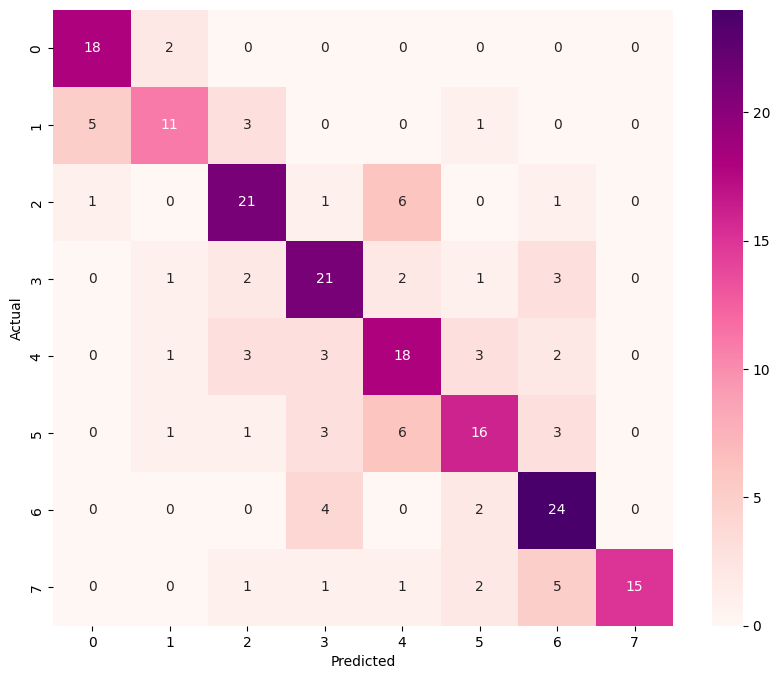

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(class_names[y_val], class_names[y_pred]), annot=True, cmap='RdPu')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
input_dir = "/content/datasets/test/test"

input_img_paths_png = sorted(
    [
        os.path.join(input_dir, fname)
        for fname in os.listdir(input_dir)
        if fname.endswith(".png")
    ]
)

print("Number of samples:", len(input_img_paths_png))

Number of samples: 673


In [ ]:
X_test = []

for i in tqdm(input_img_paths_png):
  image = cv2.cvtColor(cv2.imread(i), cv2.COLOR_BGR2GRAY)
  image = cv2.resize(image, (256, 256))
  X_test.append(image)

100%|██████████| 673/673 [00:11<00:00, 59.30it/s]


In [ ]:
X_test = np.array(X_test)
X_test = X_test.reshape(673, 256, 256)

X_rgb = np.expand_dims(X_test, axis=-1)
X_test = np.repeat(X_rgb, 3, axis=-1)
in_shape = X_test.shape[1:]
in_shape

In [ ]:
#X_test = tf.keras.applications.resnet.preprocess_input(X_test)
y_pred_pr = model.predict(X_test)
y_pred = np.argmax(y_pred_pr, axis=1)
print(class_names[y_pred])

In [ ]:
ans = class_names[y_pred]

In [ ]:
print(len(ans[ans == 0]))
print(len(ans[ans == 1]))
print(len(ans[ans == 2]))
print(len(ans[ans == 3]))
print(len(ans[ans == 4]))
print(len(ans[ans == 5]))
print(len(ans[ans == 6]))
print(len(ans[ans == 7]))

In [ ]:
df['Class'] = ans
df

In [ ]:
df.to_csv('/content/submission6.csv', index=False)

#Tranformer

In [ ]:
!pip install transformers
!pip install accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.0/280.0 kB 7.5 MB/s eta 0:00:00


##ViTF

In [ ]:
from transformers import ViTFeatureExtractor, ViTForImageClassification, ViTConfig, Trainer, TrainingArguments

model_name = "google/vit-base-patch32-384"
feature_extractor = ViTFeatureExtractor(model_name)
model = ViTForImageClassification.from_pretrained(model_name)

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/353M [00:00<?, ?B/s]

In [ ]:
import torch
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, images, labels=None):
        self.images = images
        self.labels = labels

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx].transpose(2, 0, 1)
        if self.labels is not None:
            label = torch.tensor(self.labels[idx])
            return {"pixel_values": image, "label": label}
        else:
            return {"pixel_values": image}

train_dataset = CustomDataset(X_train, y_train)
val_dataset = CustomDataset(X_val, y_val)

In [ ]:
training_args = TrainingArguments(
    output_dir="./vit_training_output",
    num_train_epochs=20,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    warmup_steps=500,
    eval_steps=500,
    evaluation_strategy="steps",
    weight_decay=0.01,
    logging_dir="./logs",
    learning_rate=1e-5,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
)

trainer.train()

Step,Training Loss,Validation Loss
500,2.300700,1.137105
1000,0.944400,0.892943
1500,0.735300,0.818459
2000,0.580900,0.749217
2500,0.444300,0.730579
3000,0.347000,0.705819


TrainOutput(global_step=3280, training_loss=0.8406375489583829, metrics={'train_runtime': 2881.114, 'train_samples_per_second': 36.375, 'train_steps_per_second': 1.138, 'total_flos': 2.4560835082636493e+19, 'train_loss': 0.8406375489583829, 'epoch': 20.0})

In [ ]:
!zip -r /content/drive/MyDrive/vit_training_output.zip vit_training_output

  adding: vit_training_output/ (stored 0%)
  adding: vit_training_output/checkpoint-1000/ (stored 0%)
  adding: vit_training_output/checkpoint-1000/config.json (deflated 66%)
  adding: vit_training_output/checkpoint-1000/optimizer.pt (deflated 7%)
  adding: vit_training_output/checkpoint-1000/rng_state.pth (deflated 25%)
  adding: vit_training_output/checkpoint-1000/scheduler.pt (deflated 55%)
  adding: vit_training_output/checkpoint-1000/training_args.bin (deflated 51%)
  adding: vit_training_output/checkpoint-1000/model.safetensors (deflated 7%)
  adding: vit_training_output/checkpoint-1000/trainer_state.json (deflated 62%)
  adding: vit_training_output/checkpoint-2500/ (stored 0%)
  adding: vit_training_output/checkpoint-2500/config.json (deflated 66%)
  adding: vit_training_output/checkpoint-2500/optimizer.pt (deflated 7%)
  adding: vit_training_output/checkpoint-2500/rng_state.pth (deflated 25%)
  adding: vit_training_output/checkpoint-2500/scheduler.pt (deflated 55%)
  adding: vi

###Evaluate

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

results = trainer.predict(val_dataset)
predicted_labels = torch.argmax(torch.tensor(results.predictions), axis=1).numpy()
accuracy = accuracy_score(y_val, predicted_labels)
f1 = f1_score(y_val, predicted_labels, average="weighted")

print(f"Validation Accuracy: {accuracy}")
print(f"Validation F1 Score: {f1}")

Validation Accuracy: 0.7547169811320755
Validation F1 Score: 0.7524374617704482


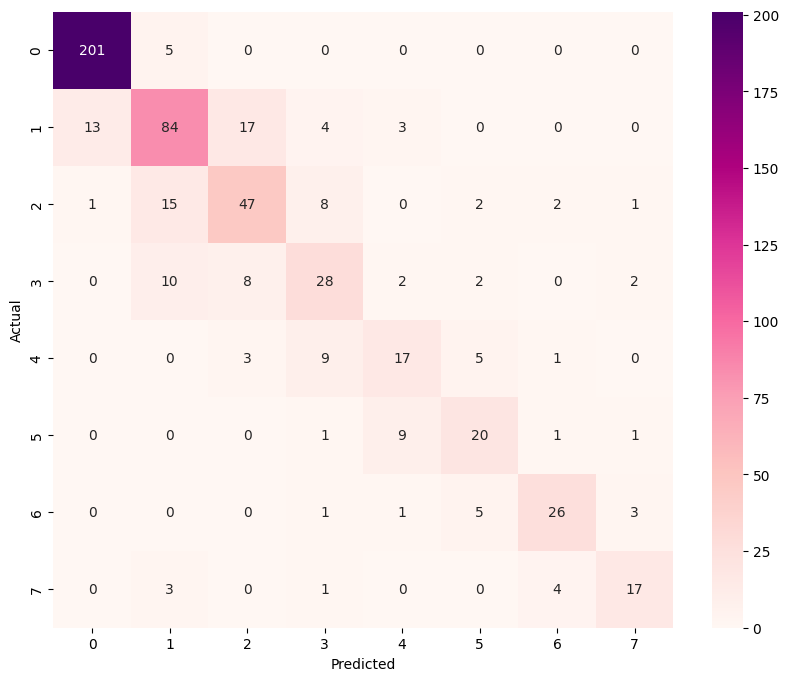

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_val, predicted_labels), annot=True, cmap='RdPu', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

##Swin

In [ ]:
from transformers import SwinForImageClassification, TrainingArguments, Trainer

model_name = "microsoft/swin-base-patch4-window12-384"
model = SwinForImageClassification.from_pretrained(model_name)

config.json:   0%|          | 0.00/71.8k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/356M [00:00<?, ?B/s]

In [ ]:
import torch
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, images, labels=None):
        self.images = images
        self.labels = labels

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx].transpose(2, 0, 1).astype(np.float32) / 255.0
        if self.labels is not None:
            label = torch.tensor(self.labels[idx])
            return {"pixel_values": torch.tensor(image), "label": label}
        else:
            return {"pixel_values": torch.tensor(image)}

train_dataset = CustomDataset(X, y)
val_dataset = CustomDataset(X_val, y_val)

In [ ]:
training_args = TrainingArguments(
    output_dir="./swin_training_output",
    num_train_epochs=15,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    eval_steps=500,
    evaluation_strategy="epoch",
    weight_decay=0.01,
    logging_dir="./logs",
    learning_rate=1e-5,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
)

trainer.train()

Epoch,Training Loss,Validation Loss
1,2.998800,0.869028
2,0.874000,0.530303
3,0.567300,0.473037


###Evaluate

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

results = trainer.predict(val_dataset)
predicted_labels = torch.argmax(torch.tensor(results.predictions), axis=1).numpy()
accuracy = accuracy_score(y_val, predicted_labels)
f1 = f1_score(y_val, predicted_labels, average="weighted")

print(f"Validation Accuracy: {accuracy}")
print(f"Validation F1 Score: {f1}")

Validation Accuracy: 0.9416809605488851
Validation F1 Score: 0.9417525802479432


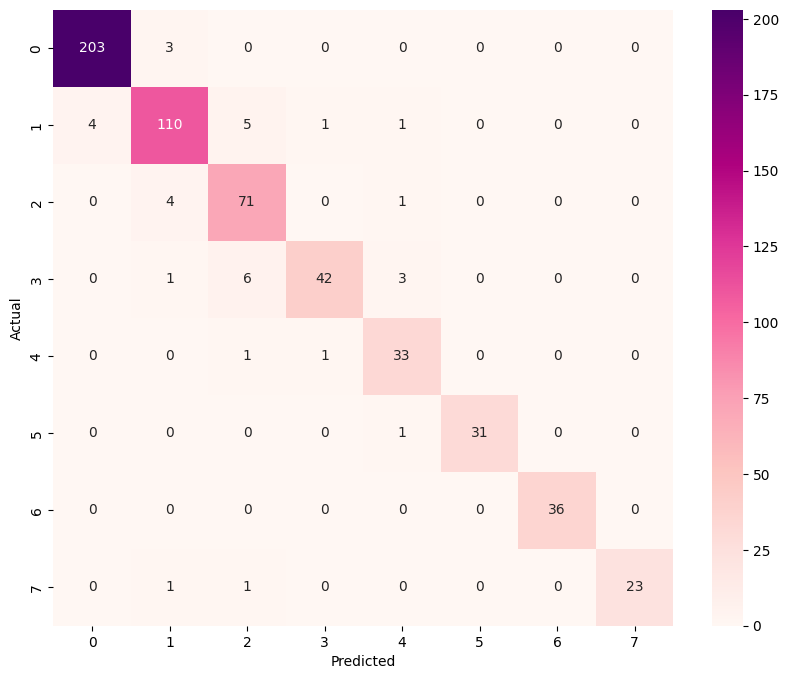

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_val, predicted_labels), annot=True, cmap='RdPu', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

##MaxViT

In [ ]:
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 33.8 MB/s eta 0:00:00


In [ ]:
import timm
import torch.nn as nn
from transformers import TrainingArguments, Trainer

class MaxxVit(nn.Module):
    def __init__(self, pretrained=True, num_classes=8):
        super(MaxxVit, self).__init__()
        self.model = timm.create_model("maxvit_small_tf_384.in1k", pretrained=pretrained, num_classes=num_classes)
        self.loss_fn = nn.CrossEntropyLoss()

    def forward(self, pixel_values, labels=None):
        outputs = self.model(pixel_values)
        logits = outputs
        loss = None
        if labels is not None:
            loss = self.loss_fn(logits, labels)
        return {"logits": logits, "loss": loss}

model = MaxxVit()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/276M [00:00<?, ?B/s]

In [ ]:
import torch
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, images, labels=None):
        self.images = images
        self.labels = labels

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx].transpose(2, 0, 1).astype(np.float32) / 255.0
        if self.labels is not None:
            label = torch.tensor(self.labels[idx])
            return {"pixel_values": torch.tensor(image), "label": label}
        else:
            return {"pixel_values": torch.tensor(image), "label": None}

train_dataset = CustomDataset(X, y)
val_dataset = CustomDataset(X_val, y_val)

In [ ]:
from transformers import default_data_collator

training_args = TrainingArguments(
    output_dir="./maxvit_training_output",
    num_train_epochs=8,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    eval_steps=500,
    evaluation_strategy="epoch",
    weight_decay=0.01,
    logging_dir="./logs",
    learning_rate=1e-4,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    data_collator=default_data_collator,
    tokenizer=None,
)

trainer.train()

Epoch,Training Loss,Validation Loss


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

results = trainer.predict(val_dataset)
predicted_labels = torch.argmax(torch.tensor(results.predictions), axis=1).numpy()
accuracy = accuracy_score(y_val, predicted_labels)
f1 = f1_score(y_val, predicted_labels, average="weighted")

print(f"Validation Accuracy: {accuracy}")
print(f"Validation F1 Score: {f1}")

Validation Accuracy: 0.9519725557461407
Validation F1 Score: 0.9520403193559127


In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_val, predicted_labels), annot=True, cmap='RdPu', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

##Deploy

In [ ]:
input_dir = "/content/datasets/test/test"

input_img_paths_png = sorted(
    [
        os.path.join(input_dir, fname)
        for fname in os.listdir(input_dir)
        if fname.endswith(".png")
    ]
)

print("Number of samples:", len(input_img_paths_png))

Number of samples: 673


In [ ]:
X_test = []

for i in tqdm(input_img_paths_png):
  image = cv2.imread(i)
  image = cv2.resize(image, (224, 224))
  X_test.append(image)

100%|██████████| 673/673 [00:15<00:00, 42.57it/s]


In [ ]:
X_test = np.stack(X_test)
X_test.shape

(673, 224, 224, 3)

In [ ]:
class TestDataset(Dataset):
    def __init__(self, images):
        self.images = images

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx].transpose(2, 0, 1).astype(np.float32) / 255.0
        return {"pixel_values": torch.tensor(image)}

test_dataset = TestDataset(X_test)
model.to("cpu")
model.eval()

predicted_labels = []
with torch.no_grad():
    for sample in tqdm(test_dataset):
        pixel_values = sample["pixel_values"].unsqueeze(0)
        logits = model(pixel_values)["logits"]
        predictions = torch.argmax(logits, dim=1).item()
        predicted_labels.append(predictions)
predicted_labels = np.array(predicted_labels)

100%|██████████| 673/673 [15:12<00:00,  1.36s/it]


In [ ]:
ans = class_names[predicted_labels]
print(len(ans[ans == 0]))
print(len(ans[ans == 1]))
print(len(ans[ans == 2]))
print(len(ans[ans == 3]))
print(len(ans[ans == 4]))
print(len(ans[ans == 5]))
print(len(ans[ans == 6]))
print(len(ans[ans == 7]))

536
42
31
13
7
21
11
12


In [ ]:
df['Class'] = ans
df

,FileName,Class
0,abdy9380.png,0
1,adua0170.png,0
2,aebq0222.png,5
3,aeew6117.png,0
4,aegl6733.png,0
...,...,...
668,zvxc1988.png,5
669,zyms7894.png,0
670,zzcb3748.png,0
671,zzts1908.png,0


In [ ]:
df.to_csv('/content/MaxViT2.csv', index=False)